# Binomial Options Pricing Model (risk neutral pricing)

*In finance, the binomial options pricing model (BOPM) provides a generalizable numerical method for the valuation of options. Essentially, the model uses a "discrete-time" (lattice based) model of the varying price over time of the underlying financial instrument, addressing cases where the closed-form Black–Scholes formula is wanting.*

*The binomial model was first proposed by William Sharpe in the 1978 edition of Investments, and formalized by Cox, Ross and Rubinstein in 1979 and by Rendleman and Bartter in that same year.*

*The binomial option pricing model values options using an iterative approach utilizing multiple periods to value American options. With the model, there are two possible outcomes with each iteration—a move up or a move down that follow a binomial tree.*

Learn more about BOPM
https://www.investopedia.com/articles/investing/021215/examples-understand-binomial-option-pricing-model.asp

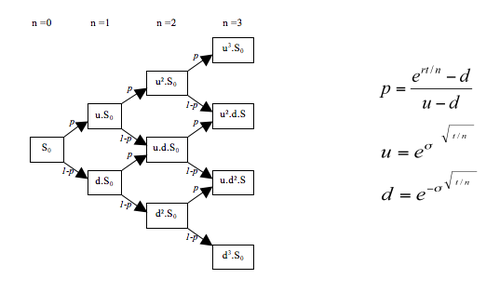

There are multiple ways to determine the values of u and d, which are the two most important parameter for risk neutral pricing. In this notebook, forward tree will be used, ie.

<h3><center>$u = e^{r-\delta h + \sigma \sqrt{h}}$</center></h3>

<h3><center>$d = e^{r-\delta h - \sigma \sqrt{h}}$</center></h3>

<h3><center>$p^* = \frac{e^{(r-\delta) h} - d}{u-d}$</center></h3>

Substitute the values of u and d to p*, we get

<h3><center>$p^* = \frac{1 - e^{-\sigma \sqrt{h}}}{e^{\sigma \sqrt{h}} - e^{-\sigma \sqrt{h}}}$</center></h3>

Noted that $\delta$ represents the continuously compounded dividend yield, $\sigma$ represents the volatility

In [3]:
import numpy as np
import graphviz

In [4]:
def binomial_tree_riskNeutralPricing(S0, K, rf, div, T, N, sigma, option_type='call'):
    
    """
    Parameters:
        S0: stock price at t=0
        K: option strike price  
        rf: annual risk free rate
        div: dividend yield
        T: time to maturity
        N: number of steps
        sigma: volatility of stock (std of continuously compounded returns)
        type of option: call/put
    Output:
        -> (option_price, asset_price)
        option_price: return a 2D list containing all option price of each node
        asset_price: return a 2D list containing all asset price of each node
    """
    
    assert (option_type in ['call','put']), "option_type only takes either 'call' or 'put' as argument"
    
    option_price = []
    asset_price = []
    
    # period per step
    h = T/N  
    
    # forward tree methodology's u&d with asset's volatility
    u = np.exp((rf-div)*h + sigma*np.sqrt(h))
    d = np.exp((rf-div)*h - sigma*np.sqrt(h))
    
    p = (np.exp((rf-div)*h) - d) / (u-d)  
    disc = np.exp(-rf*h)  
    
    # final step's asset price with vectorization
    S = S0 * d ** (np.arange(N,-1,-1)) * u ** (np.arange(0,N+1,1))
    asset_price.insert(0,np.round(S,decimals=2))
                        
    # final step's call option payoff 
    if option_type == 'call':
        C = np.maximum(S-K, np.zeros(N+1))
    elif option_type == 'put':
        C = np.maximum(K-S, np.zeros(N+1))
    
    option_price.insert(0,np.round(C,decimals=2))
    
    # step backwards through tree
    for i in np.arange(N,0,-1):
        S = S0 * d ** (np.arange(i-1,-1,-1)) * u ** (np.arange(0,i,1))
        asset_price.insert(0,np.round(S,decimals=2))
        # C[1:i+1] represents all upnodes, C[0:i] are all downnodes
        C = disc * ( p * C[1:i+1] + (1-p) * C[0:i] ) # risk neutral pricing equation
        option_price.insert(0,np.round(C,decimals=2))
    return option_price, asset_price

In [5]:
# Plot the tree with graphviz
def plot_tree(option_price, asset_price, filename):
    dot = graphviz.Digraph()
    levels = len(option_price)
    
    # title_label = '<h1>Binomial Option Pricing Model</h1>'
    # dot.node('title', label=title_label, shape='none')
    # description_label = '<p>This is a description of the graph.</p>'
    # dot.node('description', label=description_label, shape='none')
    
    # Add nodes to the graph
    for level in range(levels):
        for node in range(level+1):
            dot.node(f'{level}-{node}', label=f'S: ${asset_price[level][node]} \n C: ${option_price[level][node]}')
    
    # Add edges to the graph
    for level in range(levels - 1):
        for node in range(level + 1):
            current_node = f'{level}-{node}'
            up_node = f'{level + 1}-{node}'
            down_node = f'{level + 1}-{node + 1}'
            
            dot.edge(current_node, up_node)
            dot.edge(current_node, down_node)
    
    # Render and save the graph
    dot.format = 'png'
    dot.render(filename, view=True)

It will return something like this

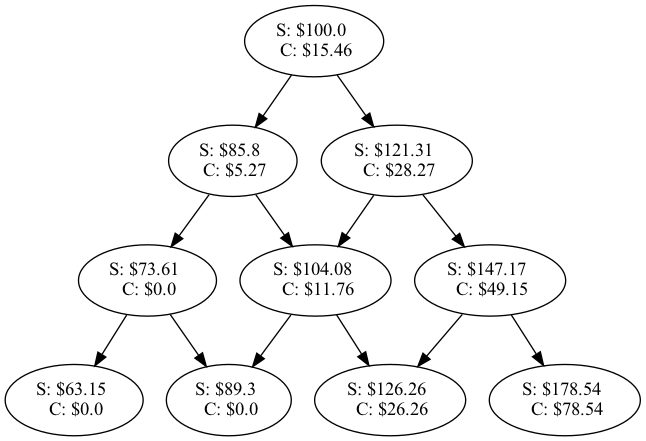

## User Area

In [6]:
# S0: stock price at t=0
# K: option strike price  
# rf: annual risk free rate
# div: dividend yield
# T: time to maturity
# N: number of steps
# sigma: volatility of stock (std of continuously compounded returns)

S0 = 100                
K = 100                 
rf = 0.06               
div = 0                
T = 1                   
N = 3                  
sigma = 0.3
option_type = 'call'

In [7]:
option_price, asset_price = binomial_tree_riskNeutralPricing(S0,K,rf,div,T,N,sigma, option_type)
plot_tree(option_price,asset_price, "BinomialOptionTree")